# Описание проекта 

*Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.*

*Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.*

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».*

## Описание данных 

**Name** — `название игры` 

**Platform** — `платформа` 

**Year_of_Release** — `год выпуска` 

**Genre** — `жанр игры` 

**NA_sales** — `продажи в Северной Америке (миллионы проданных копий)` 

**EU_sales** — `продажи в Европе (миллионы проданных копий)` 

**JP_sales** — `продажи в Японии (миллионы проданных копий)` 

**Other_sales** — `продажи в других странах (миллионы проданных копий)` 

**Critic_Score** — `оценка критиков (максимум 100)` 

**User_Score** — `оценка пользователей (максимум 10)` 

**Rating** — `рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from scipy import stats as st

## Шаг 2. Откройте файл с данными и изучите общую информацию

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод**

* Данных достаточно для анализа.
* Есть пропущенные значения и мы это видим
* Есть где преобразовать определенные тип данных
* Есть нарушения стиля в названиях.

## Шаг. Подготовьте данные 

* Замените названия столбцов (приведите к нижнему регистру); 


* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; 


* Обработайте пропуски при необходимости: 

 * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; 

 * Опишите причины, которые могли привести к пропускам; 

 * Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать; 


* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец. 

### Начнём с замены названий столбцов (приведём к нижнему регистру) для красивого стиля.

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df = df.rename(columns={
    'Name': 'name', 'Platform': 'platform','Year_of_Release': 'year_of_release',
    'Genre': 'genre','NA_sales': 'na_sales','EU_sales': 'eu_sales','JP_sales': 'jp_sales','Other_sales': 'other_sales',
    'Critic_Score': 'critic_score','User_Score': 'user_score','Rating': 'rating'
})

### В данном пункте будем работать с  пропусками которые мы нашли.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце `year_of_release, name, genre` Количество пропуском не много поэтому просто будем их удалять. Тем болле в пропуске год выхода мы нечем не можем заменить . Значение средний и медианы тоже не подходит.

In [9]:
df = df.dropna(subset=['year_of_release','name','genre'])

В столбцах `critic_score, user_score, rating` будем заменять значениями 'Заглушками', чтобы не искажать данные, так как оценки критиков и пользователей нету.

In [10]:
df['critic_score'] = df['critic_score'].fillna(-99).astype(int)
df['user_score'] = df['user_score'].fillna(-99)
df['rating'] = df['rating'].fillna('No')

### Проверим данные на дубликаты

In [11]:
df.duplicated(subset=['name','platform']).sum()

3

Обнаружили 3 дубликата будем их удалять

In [12]:
df[df.groupby(df.name + df.platform)['name'].transform('count')> 1].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82,8.5,T


In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df.duplicated().sum()

0

Дубликатов нет! Идём дальше.

### В данном пункте будем меня тип данных где это необходимо.

In [15]:
df['year_of_release'] = df['year_of_release'].astype(int)

`Tbd` аббривиатура означает `Будет определено` значит смею предположить что данный рейтинг ещё неизвестен поэтому заменим его на заглушки

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float).fillna(-99)

#### Через функцию посчитаем продажи по всем регионам

In [17]:
def total_sales(x):
    x = df['na_sales'] + df['eu_sales'] + df['jp_sales']
    return x
df['total_sales'] = total_sales(df)

In [18]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


## Шаг. Проведите исследовательский анализ данных

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? 

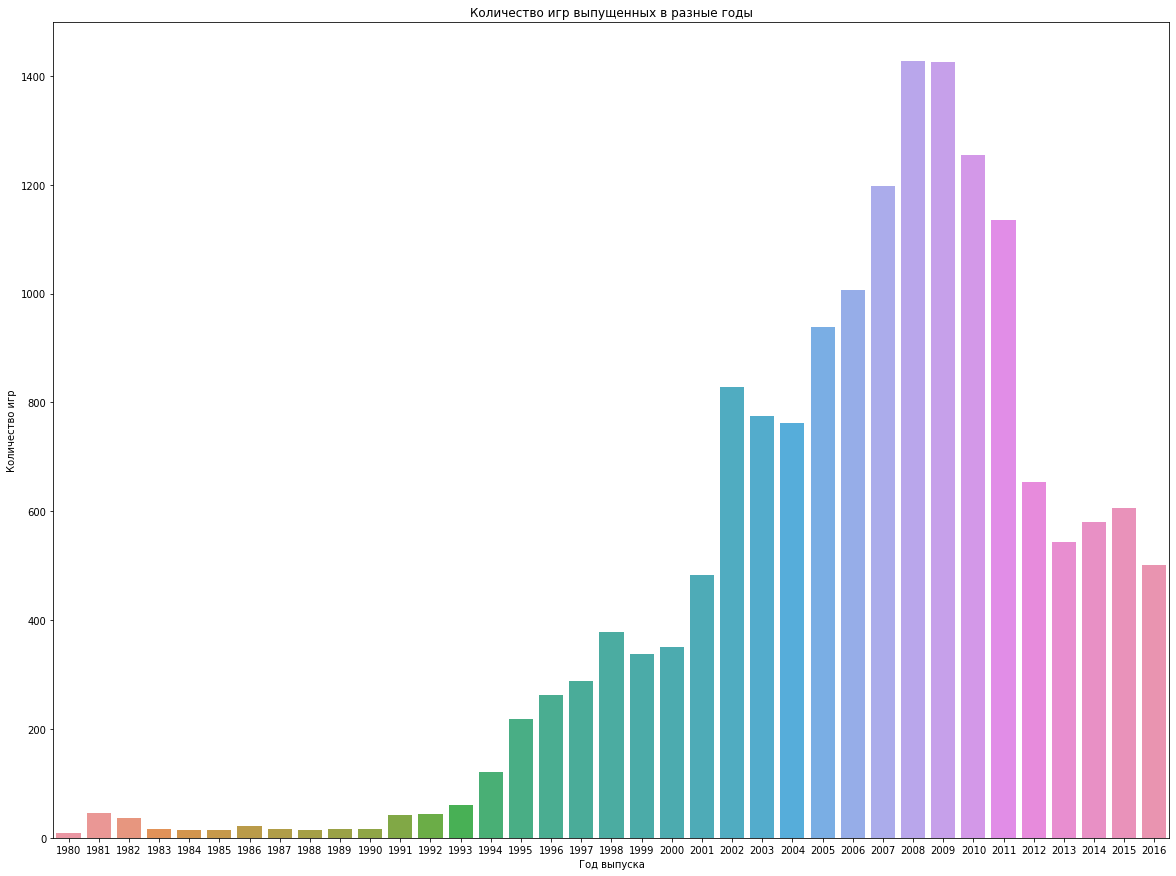

In [20]:
time_release = df.groupby(['year_of_release'])['name'].count().reset_index()
plt.figure(figsize=(20,15))
sns.barplot(x='year_of_release',y='name', data=time_release)
plt.title('Количество игр выпущенных в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Вывод:**

До 2010 было очень много игр выпущенных и был рост мы видим это на граффике. Но далее мы видим начался спад с 2010 года.
Уже в свою очередь началась стагнация уже с 2012 года - это и мы будем определять как важный период в данных для прогноза на 2017г.

2. Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 

/tmp/ipykernel_36/2146673409.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  platform_sales = df.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum().reset_index()


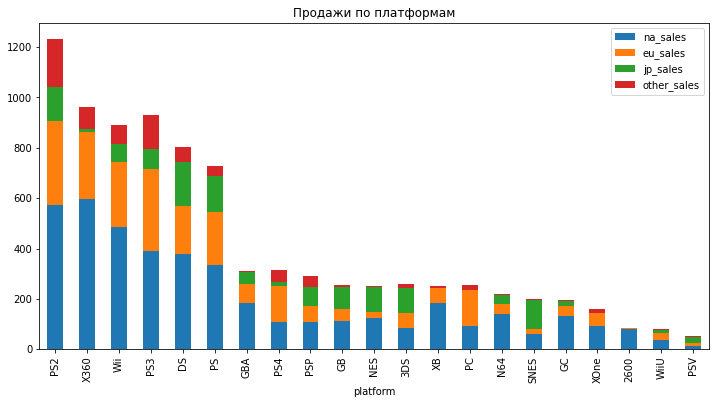

In [21]:
platform_sales = df.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum().reset_index()
(
    platform_sales[platform_sales['total_sales'] > 35]
    .sort_values(by='total_sales', ascending=False)
    .plot(
        x = 'platform', y = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
        kind='bar', stacked=True,  figsize=(12, 6), legend=True)
    .set_title('Продажи по платформам')
)
plt.show()

Вывод:

Продажи росли виден рост таких платформ как "PS2,X360,WII,PS3,DS,PS". Остальные мало популярны или только начинают своё развитие либо же исчезают как старые платформы надо проверять.

3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. 

In [61]:
df_act = df.query('year_of_release >= 2014'
                     ).pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()

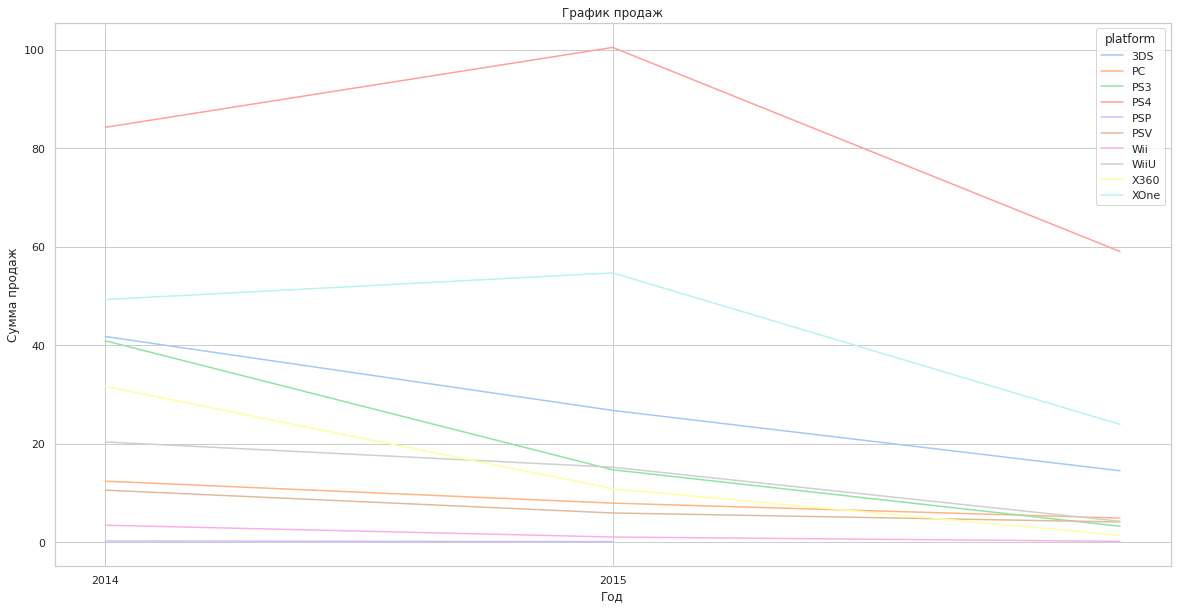

In [62]:
plt.figure(figsize=(20, 10))
sns.lineplot( data=df_act, x="year_of_release", y="total_sales", hue='platform',
                     ).set_title('График продаж')

plt.xlabel('Год')
plt.ylabel('Сумма продаж')
plt.xticks(np.arange(2014 ,2016, step=1))
plt.show()

Вывод:

Актуальный период - определим 2-3 года. Потому что в традиционных бизнесах редко берут данные больше чем за этот период. Для прогноза нам подойдёт.

4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [24]:
top = df.query('year_of_release >= 2014').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top6 = top.head(6)

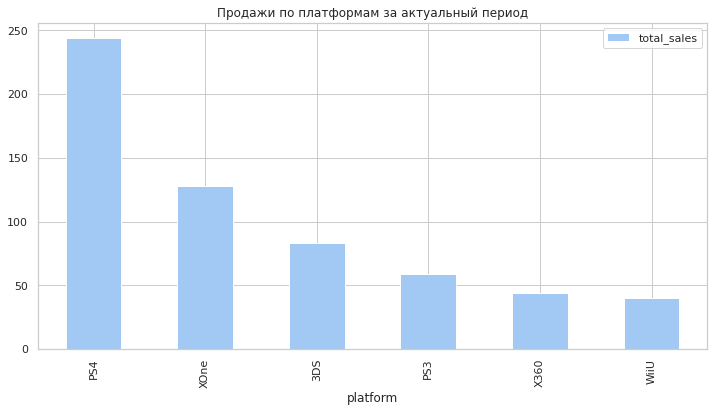

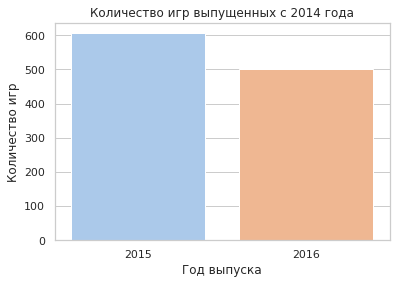

In [56]:
top6.plot(x = 'platform', y = 'total_sales', kind='bar', stacked=True,  figsize=(12, 6), legend=True).set_title('Продажи по платформам за актуальный период')
plt.show()
new = time_release[time_release['year_of_release'] >= 2015]
sns.barplot(x='year_of_release',y='name', data=new)
plt.title('Количество игр выпущенных c 2014 года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Вывод:

По графику видим что идёт прирост топ 6 платформ которых я выделил. Хоть и видно период стагнации. Возможно это период когда старые платформы уходят и на их место приходят новые быстро растущие.

5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат. 

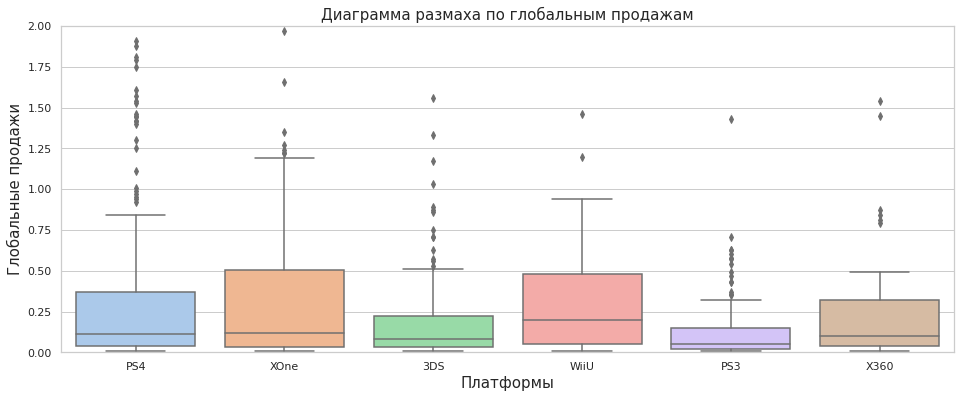

In [55]:
global_trade = df.query('year_of_release >= 2015')
global_trade = global_trade.query('platform in ["X360","PS4","PS3","3DS","XOne","WiiU"]')
sns.set(style='whitegrid',palette='pastel')
plt.figure(figsize=(16,6))
ax = sns.boxplot(data=global_trade,x='platform',y='total_sales')
plt.title('Диаграмма размаха по глобальным продажам',fontsize=15)
plt.xlabel('Платформы',fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.ylim([0,2])
plt.show()

Вывод:

На диаграмме размаха я выделил самые популярные платформы по актуальному году.

**Выбросы** присутствуют у `ВСЕХ` платформ.

**Медиана** у `PS4,XOne,WiiU,X360` примерно на одном уровне очень хорошо идут по продажам,у `3DS` и `PS3` значительно ниже чем у других. Это показывает плохую компанию по продажам данных платформ или же просто они выходят из популярности.

**Верхний квартиль** `PS4,XOne` на уровне 0.60 высокий показатель,чуть ниже у `WiiU` - 0.52, у `PS3` - 0.27, у `3DS` самый низкий показатель 0.24

**Нижний квартиль** существенной разницы нету. У платформ `X360,WiiU,PS4,XOne` они примерно на одном уровне 0.08. У `3DS,PS3` - 0.02 

6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [27]:
one_pl_critic = df.loc[(df['platform'] == 'PS4')&(df['critic_score'] != -99)]
one_pl_user = df.loc[(df['platform'] == 'PS4')&(df['user_score'] != -99)]

Коэффициент зависимости продаж от отзывов критиков: 0.40588677465201267


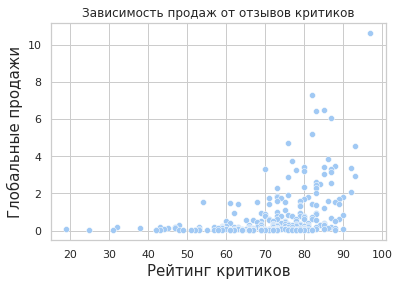

In [28]:
print('Коэффициент зависимости продаж от отзывов критиков:',one_pl_critic['total_sales'].corr(one_pl_critic['critic_score']))
sns.scatterplot(data=one_pl_critic,x='critic_score',y='total_sales')
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Рейтинг критиков',fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.show()

Коэффициент зависимости продаж от отзывов пользователей: -0.03126053686666918


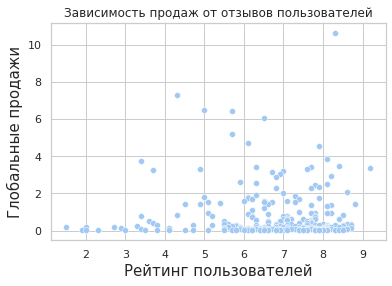

In [29]:
print('Коэффициент зависимости продаж от отзывов пользователей:',one_pl_user['total_sales'].corr(one_pl_user['user_score']))
sns.scatterplot(data=one_pl_user,x='user_score',y='total_sales')
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Рейтинг пользователей',fontsize=15)
plt.ylabel('Глобальные продажи',fontsize=15)
plt.show()

Вывод:

* Зависимость между отзывами критиков и глобальными продажами: корреляция - положительная,умеренная. Тут есть связь,но она не позволяет гарантировать рост продаж от отзывов критиков.

* Зависимость между отзывами пользователей и глобальными продажами: корреляция - отрицательная,слабая. Она близка к нуля, значит связи нет. Оценки и интерес пользователей - нету влияния.

7. Соотнесите выводы с продажами игр на других платформах.

In [30]:
for i in ['PS3', 'X360', 'WiiU', 'PS4', '3DS', 'XOne']: 
    platf = df.query("platform == @i and (user_score != -99) and (critic_score != -99)") 
    crr = round(platf['critic_score'].corr(platf['total_sales']),2)
    print('Корреляция оценок критиков к глобальным продажам:', i, crr)
print('   ')
print('   ')
for i in ['PS3', 'X360', 'WiiU', 'PS4', '3DS', 'XOne']: 
    platf = df.query("platform == @i and (user_score != -99) and (critic_score != -99)") 
    crr = round(platf['user_score'].corr(platf['total_sales']), 2) 
    print('Корреляция оценок пользователей к глобальным продажам:', i, crr)

Корреляция оценок критиков к глобальным продажам: PS3 0.43
Корреляция оценок критиков к глобальным продажам: X360 0.39
Корреляция оценок критиков к глобальным продажам: WiiU 0.35
Корреляция оценок критиков к глобальным продажам: PS4 0.41
Корреляция оценок критиков к глобальным продажам: 3DS 0.34
Корреляция оценок критиков к глобальным продажам: XOne 0.41
   
   
Корреляция оценок пользователей к глобальным продажам: PS3 0.15
Корреляция оценок пользователей к глобальным продажам: X360 0.11
Корреляция оценок пользователей к глобальным продажам: WiiU 0.39
Корреляция оценок пользователей к глобальным продажам: PS4 -0.03
Корреляция оценок пользователей к глобальным продажам: 3DS 0.23
Корреляция оценок пользователей к глобальным продажам: XOne -0.09


*Вывод:*

1) Корреляция критиков к глобальным продажам выше чем у пользователей.

2) Зависимость между отзывами пользователей и глобальными продажами: корреляция - положительная,слабая.

3) Зависимость между отзывами критиков и глобальными продажами: корреляция - положительная,умеренная.

4) Выделяется одна платформа WiiU по оценкам пользователей. Видимо она привлекает их больше,спрос на неё выше. Корреляция - положительная,умеренная.

8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

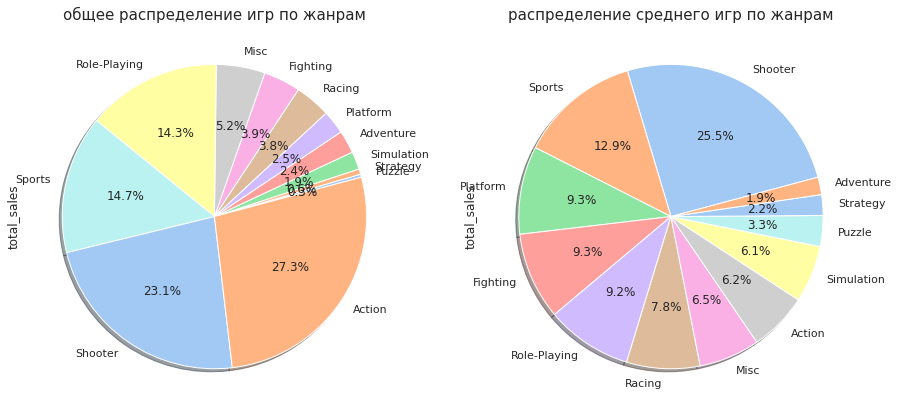

In [33]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

df_genre.plot(kind='pie',ax=ax1,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax1.set_title('общее распределение игр по жанрам',fontsize=15)

df_genre_mean.plot(kind='pie',ax=ax2,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax2.set_title('распределение среднего игр по жанрам',fontsize=15)

plt.show()

**Вывод:**

***Данные взяты за актуальный период.***

* Если мы будем смотреть общее распределение по жанрам то тут прибыльность показывает `Action(27.3%),Shooter(23.1%),Role-Playing(14.7%)` самые худшие показатели `Puzzle(0.3%),Strategy(0.6%),Simulation(1.9%)`

* Если же мы будем смотреть на их среднее значение то тут ситуация другая складывается в лидерах `Shooter(25.5%),Platform(9.3%),Sports(12.9%)` - приносят стабильно высокий доход. Самые худшие показатели в целом у тех же жанров `Advanture(1.9%),Puzzle(3.3%),Strategy(2.2%)` У большей части средние показатели очень хорошие.

## Шаг. Составьте портрет пользователя каждого региона

* Определите для пользователя каждого региона (NA, EU, JP):

* Самые популярные жанры (топ-5). Поясните разницу.

In [34]:
top_genre_na = df.loc[df['year_of_release'] >= 2014].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genre_eu = df.loc[df['year_of_release'] >= 2014].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genre_jp = df.loc[df['year_of_release'] >= 2014].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

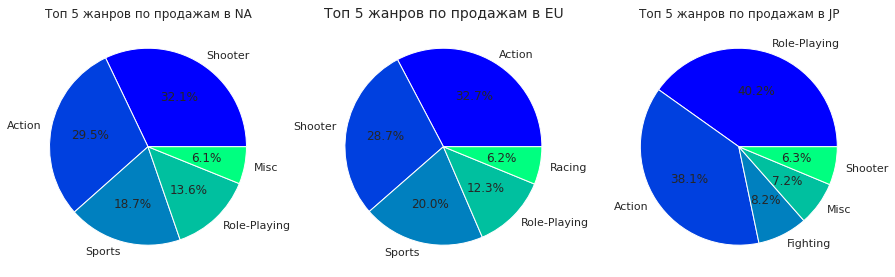

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

top_genre_na.plot(kind='pie',subplots=True, ax=ax1, legend=False, cmap='winter',autopct='%0.1f%%')
ax1.set_title('Топ 5 жанров по продажам в NA',fontsize=12)
ax1.set_ylabel('')

top_genre_eu.plot(kind='pie',subplots=True, ax=ax2, legend=False, cmap='winter',autopct='%0.1f%%',sharey=True)
ax2.set_title('Топ 5 жанров по продажам в EU',fontsize=14)

top_genre_jp.plot(kind='pie',subplots=True, ax=ax3, legend=False, cmap='winter',autopct='%0.1f%%',sharey=True)
ax3.set_title('Топ 5 жанров по продажам в JP',fontsize=12)

plt.show()

**Вывод**

`NA`,`EU`  у данных регионов в целом схожи интересы. Есть разве что отличие в попадение 5 места по продажам.

`NA` - *Shooter(32.1%),Action(29.5%),Sports(18.7%),Role-Playing(13.6%),**Misc(6.1%)**.*

`EU` - *Action(32.7%),Shooter(28.7%),Sports(20.0%),Role-Playing(12.3%),**Racing(6.2%)**.*

`JP` у данного региона складывается совсем другая специфика жанров. Возможно это связано именно с культурой этого региона. Координальное отличие от регионов `NA и EU`.

`JP` - *Role-Playing(40.2%),Action(38.1%),Fighting(8.2%),Misc(7.2%),**Shooter(6.3%)**.*


* Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [36]:
top_platform_na = df.loc[df['year_of_release'] >= 2014].groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platform_eu = df.loc[df['year_of_release'] >= 2014].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platform_jp = df.loc[df['year_of_release'] >= 2014].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

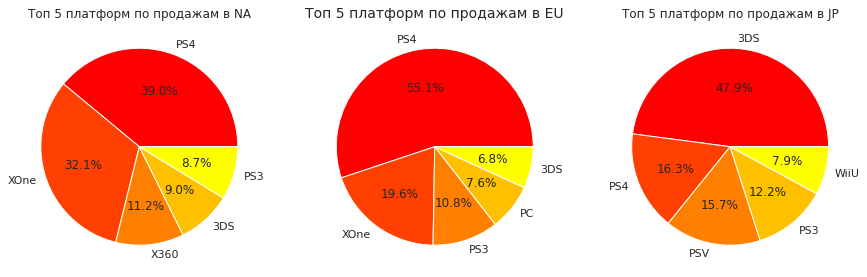

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

top_platform_na.plot(kind='pie',subplots=True, ax=ax1, legend=False, cmap='autumn',autopct='%0.1f%%')
ax1.set_title('Топ 5 платформ по продажам в NA',fontsize=12)
ax1.set_ylabel('')

top_platform_eu.plot(kind='pie',subplots=True, ax=ax2, legend=False, cmap='autumn',autopct='%0.1f%%',sharey=True)
ax2.set_title('Топ 5 платформ по продажам в EU',fontsize=14)

top_platform_jp.plot(kind='pie',subplots=True, ax=ax3, legend=False, cmap='autumn',autopct='%0.1f%%',sharey=True)
ax3.set_title('Топ 5 платформ по продажам в JP',fontsize=12)

plt.show()

**Вывод**

По плотформам можно сказать,что у `NA и EU` так же схожи интересы разве. Различие только в популярности платформ.

`NA` - *PS4(39.0%),XOne(32.1%),X360(11.2%),3DS(9.0%),PS3(8.7%)*

`EU` - *PS4(55.1%),XOne(19.6%),PS3(10.8%),PC(7.6%),3DS(6.8%)* - тут из интересного у нас появился PC уходящий,видимо много ещё олдскулов.

`JP` данный регион в целом выделялся по жанрам так же и по платформам. Хочу добавить здесь что больше половины только занимает платформа 3DS. Особенный и интересный регион.

`JP` - *3DS(47.9%),PS4(16.3%),PSV(15.7%),PS3(12.2%),WiiU(7.9%)* - хардкорные японцы выбирают олдскульные консольки)

 * Влияет ли рейтинг ESRB на продажи в отдельном регионе?

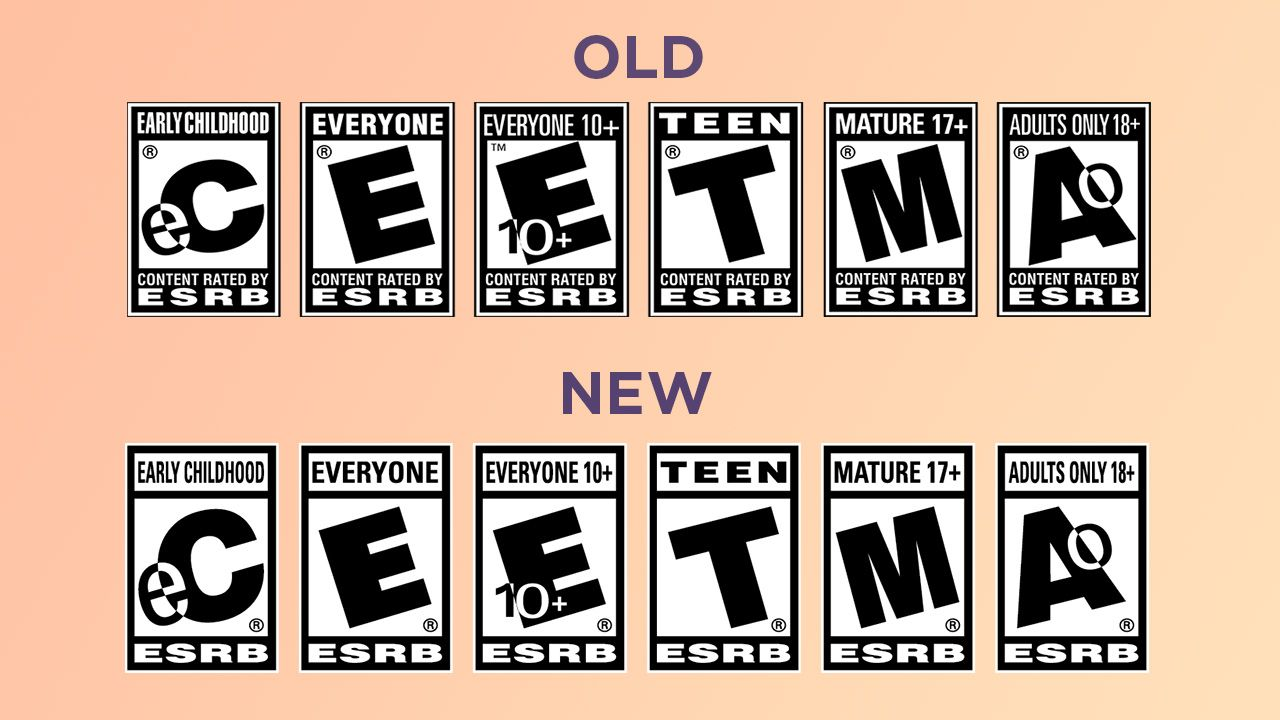

In [38]:
rating_na = df.loc[df['year_of_release'] >= 2014].groupby(['rating'])['na_sales','platform'].sum().sort_values(by='na_sales',ascending=False)
rating_eu = df.loc[df['year_of_release'] >= 2014].groupby(['rating'])['eu_sales','platform'].sum().sort_values(by='eu_sales',ascending=False)
rating_jp = df.loc[df['year_of_release'] >= 2014].groupby(['rating'])['jp_sales','platform'].sum().sort_values(by='jp_sales',ascending=False)

/tmp/ipykernel_36/2712900384.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rating_na = df.loc[df['year_of_release'] >= 2014].groupby(['rating'])['na_sales','platform'].sum().sort_values(by='na_sales',ascending=False)
/tmp/ipykernel_36/2712900384.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rating_eu = df.loc[df['year_of_release'] >= 2014].groupby(['rating'])['eu_sales','platform'].sum().sort_values(by='eu_sales',ascending=False)
/tmp/ipykernel_36/2712900384.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rating_jp = df.loc[df['year_of_release'] >= 2014].groupby(['rating'])['jp_sales','platform'].sum().sort_values(by='jp_sales',ascending=False)


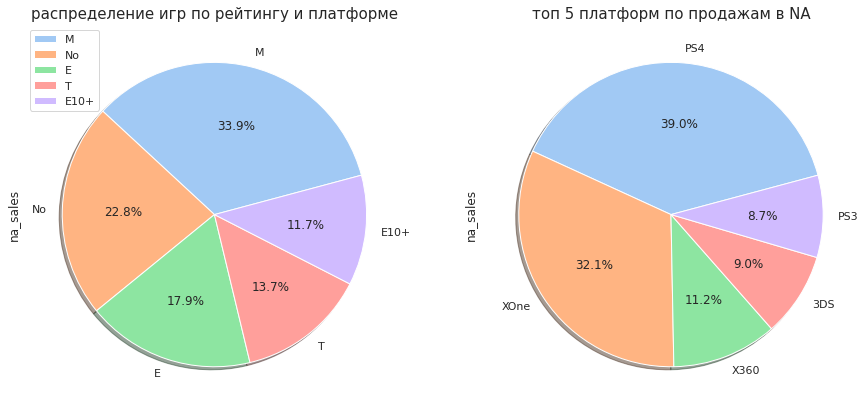

In [39]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

rating_na.plot(kind='pie',ax=ax1,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax1.set_title('распределение игр по рейтингу и платформе',fontsize=15)

top_platform_na.plot(kind='pie',ax=ax2,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax2.set_title('топ 5 платформ по продажам в NA',fontsize=15)

plt.show()

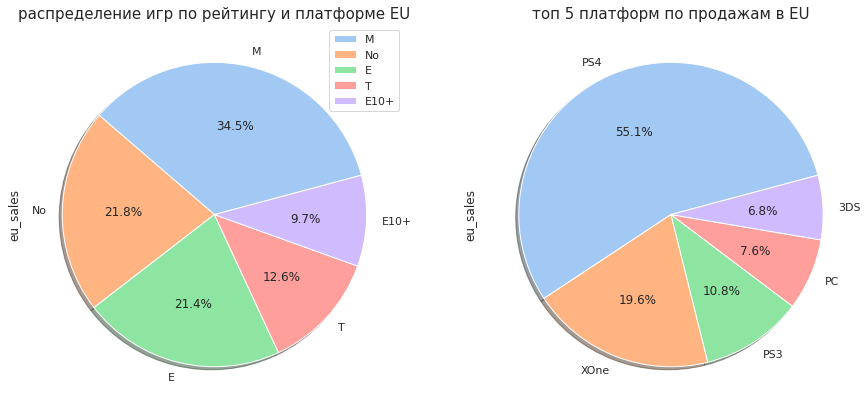

In [40]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

rating_eu.plot(kind='pie',ax=ax1,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax1.set_title('распределение игр по рейтингу и платформе EU',fontsize=15)

top_platform_eu.plot(kind='pie',ax=ax2,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax2.set_title('топ 5 платформ по продажам в EU',fontsize=15)

plt.show()

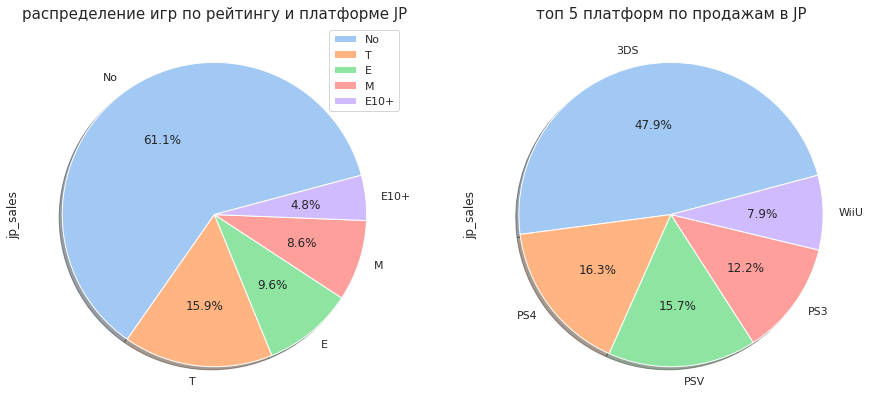

In [41]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

rating_jp.plot(kind='pie',ax=ax1,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax1.set_title('распределение игр по рейтингу и платформе JP',fontsize=15)

top_platform_jp.plot(kind='pie',ax=ax2,shadow=True,subplots=True, startangle=15,autopct='%0.1f%%')
ax2.set_title('топ 5 платформ по продажам в JP',fontsize=15)

plt.show()

**Вывод**

Честно говоря сравнивая рейтинг платформ по продажам отдельных регионах и сравнивая просто продажи, зависимость и влияния рейтинга на платформы не вижу. В Японии большое количество пропущенных значений,там видимо не особо рейтинг любят ставить так как в основном играю на консольных играх там оценивать связь нельзя.


## Шаг. Проверьте гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.*

In [42]:
xone = df.query('year_of_release >= 2014')
xone = xone.query('user_score != -99')
xone = xone.query('platform == "XOne"')['user_score'].dropna().to_list()
pc = df.query('year_of_release >= 2012')
pc = pc.query('user_score != -99')
pc = pc.query('platform == "PC"')['user_score'].dropna().to_list()

Выборка достаточная для проведения анализа. Дисперсия,среднее значение,стандартное отклонение в норме!

In [43]:
print('Дисперсия XOne:', np.var(xone), '     Дисперсия PC:', np.var(pc))
print('Среднее значение XOne:', np.mean(xone), '     Среднее значение PC:', np.mean(pc))
print('Стандартное отклонение XOne:', np.std(xone), '     Стандартное отклонение PC:', np.std(pc))

Дисперсия XOne: 1.8795460055096425      Дисперсия PC: 2.7569952398906588
Среднее значение XOne: 6.594545454545456      Среднее значение PC: 6.4286407766990274
Стандартное отклонение XOne: 1.3709653553280048      Стандартное отклонение PC: 1.660420199796021


*Тест 1* **Проверим гипотезы о равенстве среднего двух генеральных совокупностей по взятым выборкам**

* Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC разные

In [44]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    xone, 
    pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("принимаем альтернативную гипотезу о том что средние пользовательские рейтинги платформ Xbox One и PC разные")
else:
    print("принимаем нулевую гипотезу о том что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые") 

p-значение: 0.30395192726045817
принимаем нулевую гипотезу о том что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


*Тест подтвердил наши предположения. Мы принимаем Нулевую гипотезу.*

In [45]:
action = df.query('year_of_release >= 2012')
action = action.query('user_score != -99')
action = action.query('genre == "Action"')['user_score'].dropna().to_list()
sports = df.query('year_of_release >= 2012')
sports = sports.query('user_score != -99')
sports = sports.query('genre == "Sports"')['user_score'].dropna().to_list()

Выборка достаточная для проведения анализа. Дисперсия,среднее значение,стандартное отклонение в норме тоже!

In [46]:
print('Дисперсия Action:', np.var(action), '     Дисперсия Sports:', np.var(sports))
print('Среднее значение Action:', np.mean(action), '     Среднее значение Sports:', np.mean(sports))
print('Стандартное отклонение Action:', np.std(action), '     Стандартное отклонение Sports:', np.std(sports))

Дисперсия Action: 1.8854720340439224      Дисперсия Sports: 3.0073882971729127
Среднее значение Action: 6.825047801147227      Среднее значение Sports: 5.455897435897437
Стандартное отклонение Action: 1.373124915673706      Стандартное отклонение Sports: 1.7341823137066392


*Тест 2.* **Проверим гипотезы о равенстве среднего двух генеральных совокупностей по взятым выборкам**

* Нулевая гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

* Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

In [47]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    action, 
    sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("принимаем альтернативную гипотезу о том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые")
else:
    print("принимаем нулевую гипотезу о том что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.") 

p-значение: 3.7163089460934874e-26
принимаем альтернативную гипотезу о том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые


В данном случае тест нам показал что мы принимаем альтернативную гипотезу,средний рейтинг одинаковый.

## Шаг. Напишите общий вывод

***Итоговый Вывод***

* Я выявил связь с ростом и развития новых платформ. Период когда популярность набирали платформы это с 2014года. Так как затрагивать период стагнации нету смысла(с 2012г) прогноз на следующий год будет искажен.

* На графиках мы видим что идёт прирост топ 6 платформ которых я выделил. Возможно это период когда старые платформы уходят и на их место приходят новые быстро растущие.

*Так же мы проверили зависимость между отзывами критиков и пользователей и пришли к такому выводу:*

1) Корреляция критиков к глобальным продажам выше чем у пользователей.

2) Зависимость между отзывами пользователей и глобальными продажами: корреляция - положительная,слабая.

3) Зависимость между отзывами критиков и глобальными продажами: корреляция - положительная,умеренная.

4) Выделяется одна платформа WiiU по оценкам пользователей. Видимо она привлекает их больше,спрос на неё выше. Корреляция - положительная,умеренная.
                                             
**Топ 5 жанров в регионах.**

`JP` - *Role-Playing(40.2%),Action(38.1%),Fighting(8.2%),Misc(7.2%),**Shooter(6.3%)**.*

`NA` - *Shooter(32.1%),Action(29.5%),Sports(18.7%),Role-Playing(13.6%),**Misc(6.1%)**.*

`EU` - *Action(32.7%),Shooter(28.7%),Sports(20.0%),Role-Playing(12.3%),**Racing(6.2%)**.*

**Топ 5 платформ в регионах.**

`NA` - *PS4(39.0%),XOne(32.1%),X360(11.2%),3DS(9.0%),PS3(8.7%)*

`EU` - *PS4(55.1%),XOne(19.6%),PS3(10.8%),PC(7.6%),3DS(6.8%)* 

`JP` - *3DS(47.9%),PS4(16.3%),PSV(15.7%),PS3(12.2%),WiiU(7.9%)*

* Так же увидел что рейтинг ERSB не сильно влияет на предпочтению и выбор игр в разных регионах. Везде своя культура и свой интерес к разным играм. В Японии набрала популярность например консолька WiiU.

*Так же мы проверили 2 гипотезы о равенстве среднего двух генеральных совокупностей по взятым выборкам. Из них подтвердилось:*

* Нулевая гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

* Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.